In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

In [3]:
img_width, img_height = 224, 224

In [41]:
train_data_dir = '/content/drive/My Drive/Colab Notebooks/Final_leaf/train'
#test_data_dir = '/content/drive/My Drive/Colab Notebooks/beans/test'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/Final_leaf/test'
nb_train_samples =400 
nb_validation_samples = 100
epochs = 10
batch_size = 16

In [42]:
if K.image_data_format() == 'channels_first': #Returns the default image data format convention.
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

In [43]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 223, 223, 32)      416       
_________________________________________________________________
activation_10 (Activation)   (None, 223, 223, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 110, 110, 32)      4128      
_________________________________________________________________
activation_11 (Activation)   (None, 110, 110, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 54, 54, 64)       

In [45]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['acc']) 

In [46]:
train_datagen = ImageDataGenerator( 
    rescale=1. / 255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True)

In [47]:
test_datagen = ImageDataGenerator(rescale=1. / 255) 

In [48]:
train_generator = train_datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary') 

Found 441 images belonging to 2 classes.


In [49]:
validation_generator = test_datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary')

Found 84 images belonging to 2 classes.


In [50]:
history = model.fit_generator( 
    train_generator, 
    steps_per_epoch=nb_train_samples // batch_size, 
    epochs=epochs, 
    validation_data=validation_generator, 
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
25/25 [==============================] - 351s 14s/step - loss: 0.6979 - acc: 0.6921 - val_loss: 0.7750 - val_acc: 0.5952
Epoch 2/10
25/25 [==============================] - 86s 3s/step - loss: 0.5686 - acc: 0.7328 - val_loss: 1.0087 - val_acc: 0.5952
Epoch 3/10
25/25 [==============================] - 72s 3s/step - loss: 0.5644 - acc: 0.7430 - val_loss: 0.9094 - val_acc: 0.5952
Epoch 4/10
25/25 [==============================] - 68s 3s/step - loss: 0.5206 - acc: 0.7532 - val_loss: 0.9003 - val_acc: 0.5952
Epoch 5/10
25/25 [==============================] - 67s 3s/step - loss: 0.5413 - acc: 0.7379 - val_loss: 0.8931 - val_acc: 0.5952
Epoch 6/10
25/25 [==============================] - 67s 3s/step - loss: 0.5304 - acc: 0.7226 - val_loss: 0.6965 - val_acc: 0.5952
Epoch 7/10
25/25 [==============================] - 68s 3s/step - loss: 0.5536 - acc: 0.7277 - val_loss: 0.8681 - val_acc: 0.5952
Epoch 8/10
25/25 [==============================] - 68s 3s/step - loss: 0.5490 - acc: 0.

In [51]:
model.save('model_saved.h5') 

In [52]:
import matplotlib.pyplot as plt

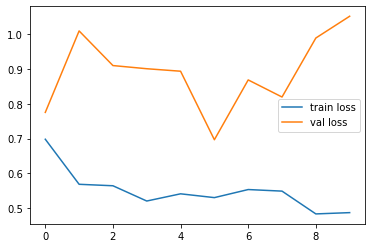

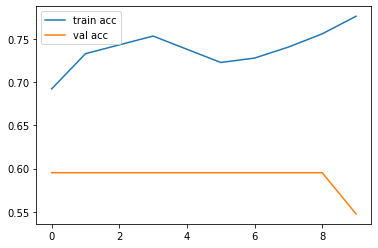

<Figure size 432x288 with 0 Axes>

In [53]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [54]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
model= load_model('model_saved.h5')

In [ ]:
#img = image.load_img('/content/drive/My Drive/Colab Notebooks/v_data/test/planes/18.jpg', target_size=(224,224))
#img = image.img_to_array(img)
#img=np.expand_dims(img, axis=0)

In [ ]:
#val=model.predict(img)
#if val==1:
#  print('this is car')
  
#else:
#  print('this is plan')

[[1.]]


<bound method Sequential.predict_classes of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f758c444c50>>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 330.png to 330.png


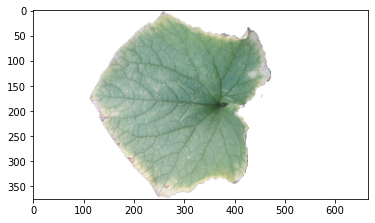

In [56]:
import matplotlib.pyplot as plt

new_image=plt.imread('330.png')
img=plt.imshow(new_image)

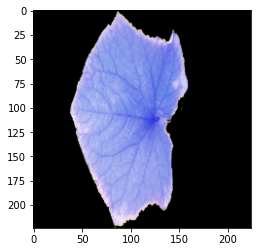

In [59]:
from skimage.transform import resize
resized_image=resize(new_image, (224,224,3))
img=plt.imshow(resized_image)

In [60]:
predictions=model.predict(np.array([resized_image]))
predictions

array([[0.6866934]], dtype=float32)

In [61]:
if predictions<0.5:
  print('disease')
  
else:
  print('no disease')


no disease
